<a href="https://colab.research.google.com/github/bring-nirachornkul/Ubers-Trip-Data-in-NYC/blob/main/Uber_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is contributed by Bring Nirachornkul. MS-AI Student at UNT. This EDA demonstrate how busiest days in the week.

# Loading the library and datasets

Import Library for this Project

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser
import calendar
import seaborn as sns
import plotly.express as px

Mounted Google Drive to the project

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [81]:
reduce_mem_usage(y_2014)

Memory usage of dataframe is 276.75 MB
Memory usage after optimization is: 246.48 MB
Decreased by 10.9%


,Base,Lat,Lon,Month,Day,Day_week,Hour
0,B02512,40.7690,-73.9549,April,1,Monday,0
1,B02512,40.7267,-74.0345,April,1,Monday,0
2,B02512,40.7316,-73.9873,April,1,Monday,0
3,B02512,40.7588,-73.9776,April,1,Monday,0
4,B02512,40.7594,-73.9722,April,1,Monday,0
...,...,...,...,...,...,...,...
1028131,B02764,40.7668,-73.9845,September,30,Monday,22
1028132,B02764,40.6911,-74.1773,September,30,Monday,22
1028133,B02764,40.8519,-73.9319,September,30,Monday,22
1028134,B02764,40.7081,-74.0066,September,30,Monday,22


In [64]:
path = '/content/drive/MyDrive/Python-Project/Fall/Data Scientist/Ubers/Ubers-Trip-Data-in-NYC/uber-trip-data/'
path

'/content/drive/MyDrive/Python-Project/Fall/Data Scientist/Ubers/Ubers-Trip-Data-in-NYC/uber-trip-data/'

# Data Wrangling

Merged all Uber trips from April to September in 2014

In [65]:
#the months that has the Uber trips in 2014
m_2014 = ['apr','may', 'jun', 'jul', 'aug', 'sep']
file_path = path + 'uber-raw-data-{}14.csv'

#Read and concatenate pickup data
y_2014 = pd.DataFrame()

for i in m_2014:
  #print('size of {0}: {1}'.format(m_2014[i], len(df.index)))
  #print(i)     #read CSV file name
  df = pd.read_csv(file_path.format(i))
  y_2014 = pd.concat([y_2014, df])
  print('size of {0}: {1}'.format(i, len(y_2014)))


size of apr: 564516
size of may: 1216951
size of jun: 1880795
size of jul: 2676916
size of aug: 3506191
size of sep: 4534327


How many rows y_2014(year 2014) has?

In [66]:
y_2014.shape

(4534327, 4)

Convert Date/Time from String to date/Time format

In [67]:
#display before convert Date/Time
y_2014.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [68]:
y_2014['Date/Time'] = pd.to_datetime(y_2014['Date/Time'])


,Date/Time,Lat,Lon,Base,Month,Day,Time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,00:11:00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,00:17:00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,00:21:00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,00:28:00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,00:33:00


Add Month, Day, Time, Hour, Day in the week column.

In [71]:
#add 'Month', 'Day', 'Time' into the column.
y_2014['Month'] = y_2014['Date/Time'].dt.month
y_2014['Day'] = y_2014['Date/Time'].dt.day
y_2014['Time'] = y_2014['Date/Time'].dt.time

#Display the dataframe after convert 'Date/Time' from string to Date/Time format.
y_2014.head()

y_2014['Day_week'] = y_2014['Date/Time'].dt.dayofweek
y_2014['Hour'] = y_2014['Date/Time'].dt.hour

y_2014.head()

,Date/Time,Lat,Lon,Base,Month,Day,Time,Day_week,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,4,1,00:11:00,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,4,1,00:17:00,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,4,1,00:21:00,1,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,4,1,00:28:00,1,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,4,1,00:33:00,1,0


In [75]:
#create a dictionary to map the month
month_map = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September'
}
#replace number by month
y_2014['Month'] = y_2014['Month'].replace(month_map)

#create a dictionary to map the day in the week
Dayweek_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
#replace number(1-7) to the day in the week
y_2014['Day_week'] = y_2014['Day_week'].replace(Dayweek_map)

final_columns = [
    'Base', 'Lat', 'Lon', 'Month', 
    'Day', 'Day_week', 'Hour']

y_2014 = y_2014[final_columns]
y_2014.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Base,Lat,Lon,Month,Day,Day_week,Hour
0,B02512,40.7690,-73.9549,April,1,Monday,0
1,B02512,40.7267,-74.0345,April,1,Monday,0
2,B02512,40.7316,-73.9873,April,1,Monday,0
3,B02512,40.7588,-73.9776,April,1,Monday,0
4,B02512,40.7594,-73.9722,April,1,Monday,0


# Data Visualization

Display the base company on April 2014

In [84]:
np.unique(y_2014['Base'].values)

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



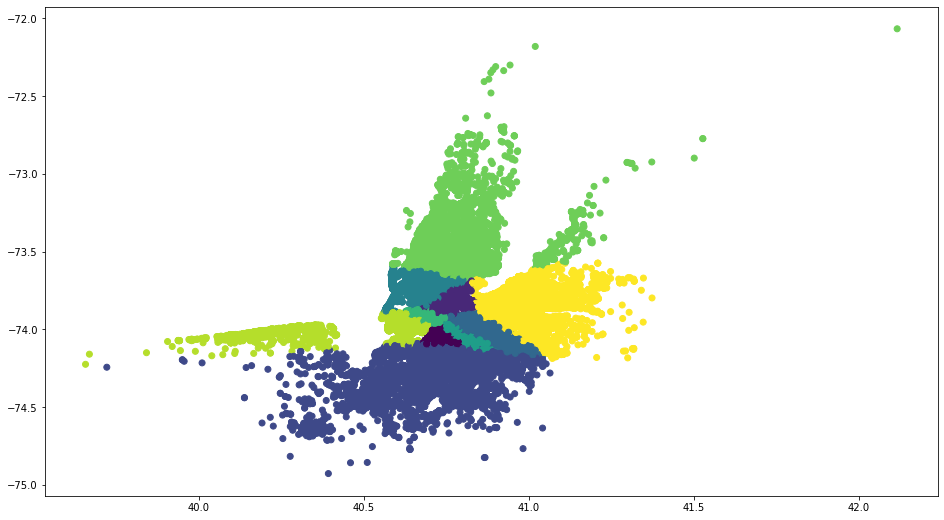

In [82]:
from sklearn.cluster import KMeans
from numpy import random, float

K = 10

lat = y_2014['Lat'].values
lon = y_2014['Lon'].values

lat_r = lat.reshape(len(lat), 1)
lon_r = lon.reshape(len(lon), 1)
cord = np.concatenate((lat_r, lon_r), 1)

model = KMeans(n_clusters=K)
model = model.fit(cord)

plt.figure(figsize=(16, 9))
plt.scatter(cord[:, 0], cord[:, 1], c=model.labels_.astype(float))
plt.show()

Convert the date/time information from string to date/time format.